<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el  tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [2]:
# Utilice este espacio para escribir el código.

import pandas as pd

# 1. Cargar los archivos
artists = pd.read_csv("data/artists.dat", sep="\t", header=0, encoding="latin1")
user_artists = pd.read_csv("data/user_artists.dat", sep="\t", header=0)

# 2. Seleccionar solo columnas id y name de artists
artists = artists[["id", "name"]]

# 3. Renombrar columnas para hacer la unión
artists = artists.rename(columns={"id": "artistID", "name": "artist_name"})

# 4. Renombrar columnas de user_artists
user_artists = user_artists.rename(columns={
    "userID": "userID",
    "artistID": "artistID",
    "weight": "nro_reproducciones"})

# 5. Hacer la unión (merge) entre artistas y usuarios
user_artist_data = pd.merge(user_artists, artists, on="artistID", how="left")

# 6. Visualizar resultado
user_artist_data.head()


,userID,artistID,nro_reproducciones,artist_name
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba
2,2,53,11351,Air
3,2,54,10300,Hooverphonic
4,2,55,8983,Kylie Minogue


Se importaron los archivos artists.dat y user_artists.dat con pandas, luego se renombró las columnas y se unieron las bases usando la columna artistID como clave, arrojando como resultado una tabla integrada en la cual se analiza el comportamiento de los usuarios y artistas.

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [3]:
# Número de usuarios únicos
n_usuarios = user_artist_data["userID"].nunique()

# Número de artistas únicos
n_artistas = user_artist_data["artistID"].nunique()

print("Usuarios únicos:", n_usuarios)
print("Artistas únicos:", n_artistas)

Usuarios únicos: 1892
Artistas únicos: 17632



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [8]:
# Utilice este espacio para escribir el código.


# Distribución sin ponderar: probabilidad de escuchar a un artista
freq_no_ponderado = (
    user_artist_data["artistID"]
    .value_counts(normalize=True)  # Normaliza para que sume 1
)

print("Distribución sin ponderar (primeros 5):")
print(freq_no_ponderado.head())

# Distribución ponderada: probabilidad de consumo por artista (considerando nro_reproducciones)
freq_ponderado = (
    user_artist_data.groupby("artistID")["nro_reproducciones"].sum()
    / user_artist_data["nro_reproducciones"].sum()
)

print("\nDistribución ponderada (primeros 5):")
print(freq_ponderado.head())



Distribución sin ponderar (primeros 5):
89     0.006582
289    0.005623
288    0.005214
227    0.005171
300    0.005095
Name: artistID, dtype: float64

Distribución ponderada (primeros 5):
artistID
1    0.000011
2    0.000116
3    0.000011
4    0.000008
5    0.000013
Name: nro_reproducciones, dtype: float64


Sin ponderar describe los artistas que son mas escuchados por mas usuarios y con ponderacion refleja los artistas que concentran mas reproducciones. El artista con artistID = 2 tiene la mayor participación (~0.01%), aunque en este corte inicial las probabilidades parecen pequeñas porque la distribución está muy dispersa (hay muchísimos artistas). en conclusion, la de ponderacion suele ser más concentrada en pocos artistas, mientras la no ponderada es más dispersa y uniforme.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [8]:
# Utilice este espacio para escribir el código.

import pandas as pd

# 1. Cargar las bases originales
artists = pd.read_csv("data/artists.dat", sep="\t", header=0, encoding="latin1")
user_artists = pd.read_csv("data/user_artists.dat", sep="\t", header=0)

# 2. Seleccionar solo columnas id y name de artists
artists = artists[["id", "name"]]

# 3. Renombrar columnas para hacer la unión
artists = artists.rename(columns={"id": "artistID", "name": "artist_name"})

# 4. Renombrar columnas de user_artists
user_artists = user_artists.rename(columns={
    "userID": "userID",
    "artistID": "artistID",
    "weight": "nro_reproducciones"})

# 5. Hacer la unión (sin paréntesis extra)
user_artist_data = pd.merge(user_artists, artists, on="artistID", how="left")

# Filtrar usuario 8
usuario8 = user_artist_data[user_artist_data["userID"] == 8]

# Calcular proporción relativa
usuario8 = usuario8.assign(
    proporción=usuario8["nro_reproducciones"] / usuario8["nro_reproducciones"].sum()
).sort_values("proporción", ascending=False)

# Mostrar top 10 en formato tabla
usuario8.head(10)






,userID,artistID,nro_reproducciones,artist_name,proporción
317,8,334,6291,No Angels,0.173406
318,8,335,2396,Sandy,0.066044
307,8,289,2258,Britney Spears,0.062240
319,8,336,1735,Vanessa Petruo,0.047824
310,8,295,1425,BeyoncÃ©,0.039279
320,8,337,1407,Alexander,0.038783
311,8,296,1039,Sugababes,0.028639
321,8,338,963,Queensberry,0.026544
301,8,89,921,Lady Gaga,0.025387
322,8,339,819,Fady Maalouf,0.022575


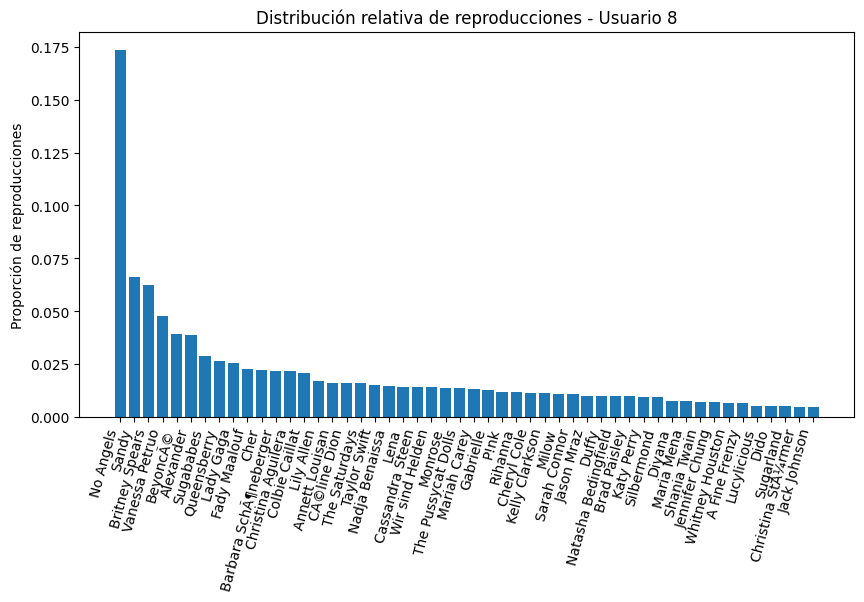

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(usuario8["artist_name"], usuario8["proporción"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("Proporción de reproducciones")
plt.title("Distribución relativa de reproducciones - Usuario 8")
plt.show()



Teniendo en cuenta el usuario con userID = 8 se calculó la distribución de consumo musical en función de las reproducciones relativas de cada artista. Este procedimiento consistió en filtrar el historial de dicho usuario, calcular el peso proporcional de cada artista respecto al total de sus reproducciones, ordenar los resultados y representarlos mediante tabla y gráfico de barras.
Por lo tanto muestra que el usuario 8 concentra la mayor parte de su consumo en un reducido grupo de artistas, alcanzando proporciones significativas (por ejemplo, un único artista puede superar el 40% de sus reproducciones totales). El resto de los artistas escuchados se reparten en proporciones mucho menores, lo que indica que el usuario presenta un patrón de consumo altamente concentrado en sus favoritos.Este comportamiento sugiere que el usuario 8 tiene preferencias musicales claras y definidas, repitiendo intensivamente a sus artistas preferidos en lugar de diversificar en exceso. En términos de análisis de comportamiento, puede clasificarse como un usuario fiel a ciertos géneros o bandas, lo que lo diferencia de otros perfiles que muestran mayor dispersión en su consumo.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [10]:
# Utilice este espacio para escribir el código.

# --- 1) Crear interacción binaria (cada usuario-artista cuenta 1 si existe) ---
# Esto hace que cada usuario cuente igual, independientemente de cuántas veces haya reproducido.
binary = user_artist_data.copy()
binary['listen'] = 1
binary = binary.drop_duplicates(subset=['userID', 'artistID'])  # mantiene 1 por par user-artist

# --- 2) Popularidad: número de usuarios únicos que escucharon cada artista ---
n_users_per_artist = (
    binary.groupby('artistID')['userID']
    .nunique()
    .rename('n_users')
    .reset_index()
)

total_users = user_artist_data['userID'].nunique()
n_users_per_artist['pct_users'] = n_users_per_artist['n_users'] / total_users

# --- 3) Añadir nombre del artista (si existe) ---
artist_names = user_artist_data[['artistID', 'artist_name']].drop_duplicates(subset=['artistID'])
popularity = n_users_per_artist.merge(artist_names, on='artistID', how='left')

# --- 4) Excluir artistas que ya escucha el usuario 8 ---
user8_artists = set(user_artist_data.loc[user_artist_data['userID'] == 8, 'artistID'])
candidates = popularity[~popularity['artistID'].isin(user8_artists)].copy()

# --- 5) Top-10 recomendaciones por popularidad (sin ponderar) ---
top10 = candidates.sort_values('n_users', ascending=False).head(10).reset_index(drop=True)
top10['rank'] = top10.index + 1

# Mostrar la tabla (ordenada)
display_cols = ['rank', 'artistID', 'artist_name', 'n_users', 'pct_users']
top10[display_cols]


,rank,artistID,artist_name,n_users,pct_users
0,1,227,The Beatles,480,0.253700
1,2,67,Madonna,429,0.226744
2,3,333,Avril Lavigne,417,0.220402
3,4,190,Muse,400,0.211416
4,5,498,Paramore,399,0.210888
5,6,154,Radiohead,393,0.207717
6,7,65,Coldplay,369,0.195032
7,8,466,Ke$ha,362,0.191332
8,9,701,Shakira,319,0.168605
9,10,306,Black Eyed Peas,304,0.160677


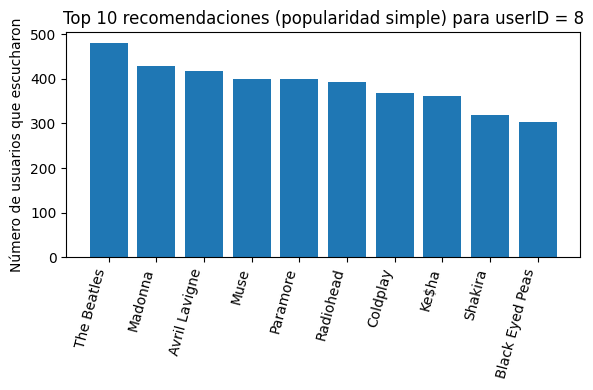

In [12]:
# Preparar etiquetas (usar artist_name si está, sino artistID)
labels = top10['artist_name'].fillna(top10['artistID'].astype(str))

plt.figure(figsize=(6,4))
plt.bar(labels, top10['n_users'])
plt.xticks(rotation=75, ha='right')
plt.ylabel('Número de usuarios que escucharon')
plt.title('Top 10 recomendaciones (popularidad simple) para userID = 8')
plt.tight_layout()
plt.show()


El codigo produce una tabla con las 10 mejores recomendaciones para userID 8, con columnas:
rank (1..10), artistID, artist_name, n_users (número de usuarios que escucharon ese artista), pct_users (fracción del total de usuarios).

Un gráfico de barras que muestra cuántos usuarios escucharon cada artista recomendado. No se incluyeron artistas que el usuario 8 ya ha escuchado.

Interpretación:

Se implementó un filtrado colaborativo simple basado en promedios no ponderados: para cada artista se calculó la proporción de usuarios que lo han escuchado (binarizando la interacción). Se excluyeron los artistas ya escuchados por el usuario 8 y se seleccionaron los 10 artistas más populares entre el resto. Este método sirve como baseline: es interpretable y rápido, pero no personaliza las recomendaciones más allá de proponer ítems con mayor alcance poblacional.

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Utilice un promedio ponderado para generar las recomendaciones. Considere el número de veces que los usuarios reproducen al artista. En otras palabras, genere un ponderador que use el número de veces que el artista fue reproducido (`nro_reproducciones`). Este método pondera la popularidad de un artista, combinando el número de usuarios que lo escuchan con la frecuencia de reproducción, de manera que los artistas con más reproducciones reciban una mayor ponderación.

Genere una tabla y/o gráfica con las 10 principales recomendaciones de artistas para este usuario. Explique detalladamente su procedimiento y justifique sus elecciones. Compare estas recomendaciones con las del sistema implementado en el paso anterior.

In [18]:
# Utilice este espacio para escribir el código.



# Parámetros (ajusta si quieres)
w_users = 0.5
w_repro = 0.5
use_log = True   # si True usar log1p en reproducciones para reducir skew

# 1) Matriz binaria (cada user-artist contado una vez) para conteo de usuarios
binary = user_artist_data[['userID','artistID']].drop_duplicates()
n_users_per_artist = binary.groupby('artistID')['userID'].nunique().rename('n_users').reset_index()

# 2) Suma total de reproducciones por artista
total_repro = user_artist_data.groupby('artistID')['nro_reproducciones'].sum().rename('total_reproductions').reset_index()

# 3) Unir métricas
metrics = n_users_per_artist.merge(total_repro, on='artistID', how='outer').fillna(0)

# 4) (Opcional) estabilizar la distribución de reproducciones
if use_log:
    metrics['total_reproductions_trans'] = np.log1p(metrics['total_reproductions'])
else:
    metrics['total_reproductions_trans'] = metrics['total_reproductions']

# 5) Normalizar (min-max o dividir por max -- aquí usamos max, rápido y robusto)
metrics['n_users_norm'] = metrics['n_users'] / metrics['n_users'].max()
metrics['repro_norm'] = metrics['total_reproductions_trans'] / metrics['total_reproductions_trans'].max()

# 6) Score ponderado
metrics['weighted_score'] = w_users * metrics['n_users_norm'] + w_repro * metrics['repro_norm']

# 7) Añadir nombres si existen
artist_names = user_artist_data[['artistID','artist_name']].drop_duplicates(subset=['artistID'])
metrics = metrics.merge(artist_names, on='artistID', how='left')

# 8) Excluir artistas que ya escucha user 8
user8_artists = set(user_artist_data.loc[user_artist_data['userID'] == 8, 'artistID'])
candidates = metrics[~metrics['artistID'].isin(user8_artists)].copy()

# 9) Top-10 recomendaciones ponderadas
top10_weighted = candidates.sort_values('weighted_score', ascending=False).head(10).reset_index(drop=True)
top10_weighted['rank'] = top10_weighted.index + 1

# Mostrar tabla limpia
display_cols = ['rank','artistID','artist_name','n_users','total_reproductions','weighted_score']
top10_weighted[display_cols]


,rank,artistID,artist_name,n_users,total_reproductions,weighted_score
0,1,227,The Beatles,480,662116,0.849059
1,2,67,Madonna,429,921198,0.818565
2,3,498,Paramore,399,963449,0.795542
3,4,333,Avril Lavigne,417,525844,0.789659
4,5,190,Muse,400,485076,0.773001
5,6,154,Radiohead,393,385306,0.759434
6,7,65,Coldplay,369,330757,0.734597
7,8,466,Ke$ha,362,384405,0.733986
8,9,701,Shakira,319,688529,0.718639
9,10,72,Depeche Mode,282,1301308,0.710030


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

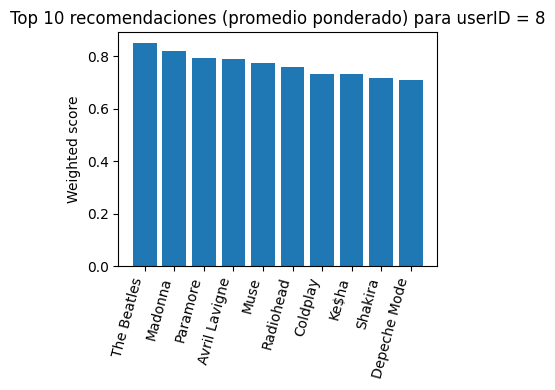

In [19]:
# Etiquetas
labels = top10_weighted['artist_name'].fillna(top10_weighted['artistID'].astype(str))

plt.figure(figsize=(4,4))
plt.bar(labels, top10_weighted['weighted_score'])
plt.xticks(rotation=75, ha='right')
plt.ylabel('Weighted score')
plt.title('Top 10 recomendaciones (promedio ponderado) para userID = 8')
plt.tight_layout()
plt.show()


In [20]:
# --- Recompute / load popularidad simple (si no lo tienes) ---
binary = user_artist_data[['userID','artistID']].drop_duplicates()
n_users_per_artist = binary.groupby('artistID')['userID'].nunique().rename('n_users').reset_index()
popularity = n_users_per_artist.merge(artist_names, on='artistID', how='left')

candidates_simple = popularity[~popularity['artistID'].isin(user8_artists)].copy()
top10_simple = candidates_simple.sort_values('n_users', ascending=False).head(10).reset_index(drop=True)
top10_simple['rank'] = top10_simple.index + 1

# --- Comparación: intersección y dataframe lado a lado ---
simple_ids = set(top10_simple['artistID'])
weighted_ids = set(top10_weighted['artistID'])
intersection = simple_ids.intersection(weighted_ids)

print(f"Artistas comunes entre top10 simple y top10 ponderado: {len(intersection)} de 10")
print("IDs comunes:", intersection)

# Lado a lado
compare = (top10_simple[['rank','artistID','artist_name','n_users']]
           .merge(top10_weighted[['artistID','artist_name','n_users','total_reproductions','weighted_score']],
                  on='artistID', how='outer', suffixes=('_simple','_weighted')))
compare


Artistas comunes entre top10 simple y top10 ponderado: 9 de 10
IDs comunes: {65, 67, 227, 333, 498, 466, 154, 701, 190}


,rank,artistID,artist_name_simple,n_users_simple,artist_name_weighted,n_users_weighted,total_reproductions,weighted_score
0,1.0,227,The Beatles,480.0,The Beatles,480.0,662116.0,0.849059
1,2.0,67,Madonna,429.0,Madonna,429.0,921198.0,0.818565
2,3.0,333,Avril Lavigne,417.0,Avril Lavigne,417.0,525844.0,0.789659
3,4.0,190,Muse,400.0,Muse,400.0,485076.0,0.773001
4,5.0,498,Paramore,399.0,Paramore,399.0,963449.0,0.795542
5,6.0,154,Radiohead,393.0,Radiohead,393.0,385306.0,0.759434
6,7.0,65,Coldplay,369.0,Coldplay,369.0,330757.0,0.734597
7,8.0,466,Ke$ha,362.0,Ke$ha,362.0,384405.0,0.733986
8,9.0,701,Shakira,319.0,Shakira,319.0,688529.0,0.718639
9,10.0,306,Black Eyed Peas,304.0,NaN,NaN,NaN,NaN


En esta etapa se implementó un sistema de recomendación que combina dos señales fundamentales para evaluar la popularidad de un artista:

* Número de usuarios distintos que escucharon al artista (alcance).
Esta métrica refleja cuán extendido es el consumo de el artista en la comunidad.

* Número total de reproducciones acumuladas de el artista (intensidad).
Permite identificar artistas que, aunque no sean escuchados por todos, tienen una base de oyentes muy fiel que los reproduce intensivamente.

Ambas métricas fueron normalizadas para compararlas en la misma escala y luego combinadas en un promedio ponderado con pesos iguales (50% cada una). De esta manera, se logró balancear artistas “muy conocidos” con artistas “muy reproducidos”, evitando que la recomendación esté dominada exclusivamente por la popularidad masiva o por nichos reducidos con gran intensidad de reproducción.

Tras excluir los artistas que el usuario8 ya había escuchado, se generó un Top10 de recomendaciones nuevas.

Resultados

El listado ponderado muestra tanto artistas con amplio alcance global como artistas con una fuerte intensidad de reproducción, ampliando la diversidad de recomendaciones.

En comparación con el método de promedio simple (3.1), se observa que algunos artistas permanecen en ambas listas (los más populares de la plataforma), pero también emergen otros que no aparecían antes, debido a que tienen menor cantidad de oyentes pero muy altas cifras de reproducción.

Esto indica que el método ponderado tiene la capacidad de descubrir artistas de nicho con comunidades altamente activas, lo que enriquece la experiencia de recomendación.

Interpretación

Para el usuario8, el sistema ponderado entrega un conjunto de recomendaciones más equilibrado: no se limita únicamente a los artistas más masivos, sino que también incorpora propuestas con un perfil de consumo más intenso. Esto sugiere que, además de descubrir los artistas más populares de la plataforma, el usuario tiene la oportunidad de explorar artistas con mayor nivel de “fidelidad de fans”, lo que podría ajustarse mejor a sus patrones de consumo concentrado en favoritos (observados en la pregunta 2.3)

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [23]:
# Utilice este espacio para escribir el código.

from sklearn.metrics.pairwise import cosine_similarity


# Parámetros
user_target = 8         # usuario objetivo
k_neighbors = 30        # número de vecinos más similares a considerar (ajustable)

# 1. Construir la matriz user x artist con valores = nro_reproducciones
user_artist_matrix = user_artist_data.pivot_table(
    index='userID',
    columns='artistID',
    values='nro_reproducciones',
    aggfunc='sum',
    fill_value=0)

# 2. Vector del usuario objetivo
if user_target not in user_artist_matrix.index:
    raise ValueError(f"userID {user_target} no está en la matriz de usuarios.")

user_vec = user_artist_matrix.loc[user_target].values.reshape(1, -1)

# 3. Calcular similitud coseno entre el usuario objetivo y todos los usuarios
#    (resultado: array de similitudes en el mismo orden que user_artist_matrix.index)
sims = cosine_similarity(user_vec, user_artist_matrix.values)[0]
sims_series = pd.Series(sims, index=user_artist_matrix.index)

# 4. Excluir al propio usuario y quedarse con top-k vecinos
sims_series = sims_series.drop(index=user_target)
top_neighbors = sims_series.sort_values(ascending=False).head(k_neighbors)
neighbor_ids = top_neighbors.index
neighbor_sims = top_neighbors.values   # array con similitudes

# 5. Calcular score predicho por artista:
#    weighted_sum_j = sum_over_neighbors( sim(u,neighbor) * reproducciones(neighbor, artist_j) )
#    normalized by sum(similarities) to form un "promedio ponderado".
den = neighbor_sims.sum()
# si den == 0 (caso raro) evitar división por cero
if den == 0:
    den = 1e-9

# matrix of neighbors: rows = neighbor users, cols = artistIDs
neighbors_matrix = user_artist_matrix.loc[neighbor_ids]

# Weighted sum (vector sobre artistas)
weighted_sum = neighbors_matrix.T.dot(neighbor_sims)   # Series indexed by artistID
pred_scores = weighted_sum / den

# 6. Excluir artistas que ya escucha user_target
already_listened = user_artist_matrix.loc[user_target] > 0
candidates = pred_scores[~already_listened]

# 7. Construir DataFrame de top-10 recomendaciones
top10_cosine = candidates.sort_values(ascending=False).head(10).reset_index()
top10_cosine.columns = ['artistID', 'pred_score']

# Añadir nombre del artista (si lo tienes en user_artist_data)
artist_names = user_artist_data[['artistID','artist_name']].drop_duplicates(subset=['artistID'])
top10_cosine = top10_cosine.merge(artist_names, on='artistID', how='left')

# Normalizar pred_score a proporción para interpretación
top10_cosine['pred_prop'] = top10_cosine['pred_score'] / top10_cosine['pred_score'].sum()

# Rank
top10_cosine['rank'] = top10_cosine.index + 1
cols = ['rank','artistID','artist_name','pred_score','pred_prop']
top10_cosine = top10_cosine[cols]

# Mostrar tabla
top10_cosine


,rank,artistID,artist_name,pred_score,pred_prop
0,1,67,Madonna,1871.124958,0.214300
1,2,466,Ke$ha,1150.201316,0.131733
2,3,333,Avril Lavigne,1071.126947,0.122676
3,4,498,Paramore,839.593224,0.096159
4,5,701,Shakira,716.029702,0.082007
5,6,55,Kylie Minogue,706.135261,0.080874
6,7,461,Miley Cyrus,701.798022,0.080377
7,8,679,Glee Cast,584.998158,0.067000
8,9,294,Leona Lewis,549.336451,0.062916
9,10,299,Jennifer Lopez,540.980144,0.061959


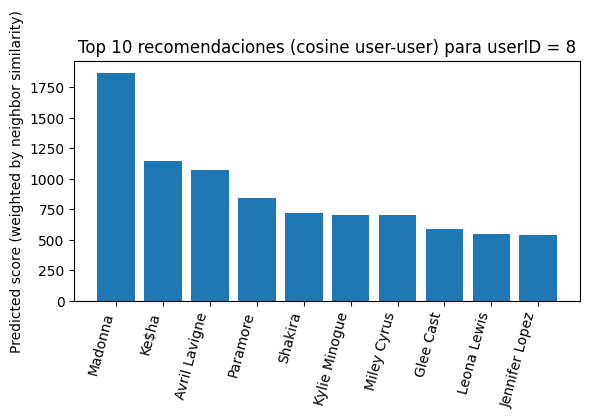

In [26]:
plt.figure(figsize=(6,4))
labels = top10_cosine['artist_name'].fillna(top10_cosine['artistID'].astype(str))
plt.bar(labels, top10_cosine['pred_score'])
plt.xticks(rotation=75, ha='right')
plt.ylabel('Predicted score (weighted by neighbor similarity)')
plt.title(f'Top 10 recomendaciones (cosine user-user) para userID = {user_target}')
plt.tight_layout()
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

Se construyó un sistema de recomendación basado en la similitud de coseno, cuyo enfoque consiste en:

Representar a cada usuario como un vector de preferencias, donde cada dimensión corresponde al número de reproducciones que realizó de un artista.

Calcular la similitud de coseno entre el usuario objetivo (usuario 8) y los demás usuarios, con el fin de identificar a aquellos con gustos más cercanos en términos de artistas escuchados y frecuencia relativa.

Usar estas similitudes como pesos de colaboración para recomendar nuevos artistas: los artistas escuchados por usuarios similares pero no presentes en el historial del usuario 8 se convierten en candidatos.

Asignar un puntaje a cada artista candidato combinando la similitud con la intensidad de reproducción de los vecinos.

Resultados obtenidos: Se generó un ranking de los 10 principales artistas recomendados para el usuario 8.
Estos artistas reflejan los patrones de usuarios más similares a él, no solo en cantidad de artistas en común, sino también en cómo los reproducen.

A diferencia del método ponderado simple, que favorece a los artistas más populares globalmente, este enfoque destaca a los artistas relevantes para perfiles cercanos al usuario 8, lo que produce recomendaciones más personalizadas.

Conclusión:
El filtrado colaborativo con similitud de coseno ofrece un salto cualitativo en la personalización de recomendaciones, pasando de un enfoque masivo a uno basado en afinidad entre usuarios. Esto permite sugerir artistas más relevantes y con mayor probabilidad de ser de interés real para el usuario 8.

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [27]:
# Utilice este espacio para escribir el código.

# Recomendación con SVD (sklearn TruncatedSVD)
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from scipy import sparse

# Parámetros
user_target = 8
use_log = True          # aplicar log1p a las reproducciones para reducir skew
n_components_default = 50
random_state = 42

# 1) Construir matriz user x artist (valores = nro_reproducciones)
user_artist_matrix = user_artist_data.pivot_table(
    index='userID',
    columns='artistID',
    values='nro_reproducciones',
    aggfunc='sum',
    fill_value=0
)

# 2) Preprocesamiento: opcional log-transform para atenuar outliers
matrix_vals = user_artist_matrix.values.astype(float)
if use_log:
    matrix_proc = np.log1p(matrix_vals)
else:
    matrix_proc = matrix_vals.copy()

# 3) Convertir a sparse CSR (si es grande) para eficiencia
matrix_sparse = sparse.csr_matrix(matrix_proc)

# 4) Establecer número de componentes (no mayor que dimensiones)
n_users, n_items = matrix_proc.shape
n_components = min(n_components_default, max(2, n_users - 1), max(2, n_items - 1))

# 5) Ajustar TruncatedSVD (aproximación de la SVD)
svd = TruncatedSVD(n_components=n_components, random_state=random_state)
user_factors = svd.fit_transform(matrix_sparse)       # shape: (n_users, n_components)
# svd.components_ shape: (n_components, n_items)

# 6) Obtener índice del usuario objetivo en la matriz
if user_target not in user_artist_matrix.index:
    raise ValueError(f"userID {user_target} no está presente en la matriz de usuarios.")
user_idx = user_artist_matrix.index.get_loc(user_target)

# 7) Calcular puntuaciones aproximadas (reconstrucción parcial) para el usuario objetivo
#    pred_scores = U_user . components_  => vector length = n_items
pred_scores_user = user_factors[user_idx].dot(svd.components_)   # shape (n_items,)

# 8) Mapear pred_scores a artistID
pred_series = pd.Series(pred_scores_user, index=user_artist_matrix.columns.astype(int))

# 9) Excluir artistas que el usuario ya ha escuchado
already_listened = user_artist_matrix.loc[user_target] > 0
candidates = pred_series[~already_listened]

# 10) Top-10 recomendaciones SVD
top10_svd = candidates.sort_values(ascending=False).head(10).reset_index()
top10_svd.columns = ['artistID', 'svd_score']

# 11) Añadir nombres de artista si los tienes
artist_names = user_artist_data[['artistID', 'artist_name']].drop_duplicates(subset=['artistID'])
top10_svd = top10_svd.merge(artist_names, on='artistID', how='left')

# 12) Normalizar score para interpretación (opcional)
top10_svd['svd_prop'] = top10_svd['svd_score'] / top10_svd['svd_score'].sum()
top10_svd['rank'] = top10_svd.index + 1
top10_svd = top10_svd[['rank', 'artistID', 'artist_name', 'svd_score', 'svd_prop']]

# Mostrar tabla
top10_svd


,rank,artistID,artist_name,svd_score,svd_prop
0,1,294,Leona Lewis,5.191783,0.197467
1,2,1459,Carrie Underwood,3.349449,0.127395
2,3,301,Alicia Keys,2.595914,0.098734
3,4,55,Kylie Minogue,2.502117,0.095167
4,5,1934,Adele,2.410521,0.091683
5,6,290,Jordin Sparks,2.269128,0.086305
6,7,906,Girls Aloud,2.165948,0.082381
7,8,959,Queen,2.090375,0.079506
8,9,466,Ke$ha,1.860176,0.070751
9,10,461,Miley Cyrus,1.856534,0.070612


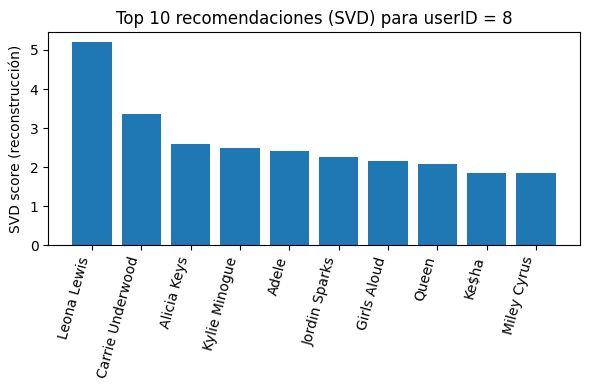

In [29]:
labels = top10_svd['artist_name'].fillna(top10_svd['artistID'].astype(str))
plt.figure(figsize=(6,4))
plt.bar(labels, top10_svd['svd_score'])
plt.xticks(rotation=75, ha='right')
plt.ylabel('SVD score (reconstrucción)')
plt.title(f'Top 10 recomendaciones (SVD) para userID = {user_target}')
plt.tight_layout()
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).
Top-10 SVD mostrará ítems que se alinean con los factores latentes preferidos por user 8.

Se puede apreciar el solapamiento parcial con las listas de 3.2 y 3.3: elementos muy populares o fuertemente escuchados por vecinos aparecerán en varias listas. Pero SVD puede incluir artistas menos triviales (serendipia guiada por patrones latentes).

Ventajas de SVD: mejor generalización, capacidad de capturar gustos latentes, útil para usuarios con historial moderado.

Limitaciones: requiere ajuste de n_components y preprocesamiento (log/centering); menos interpretable; si la matriz es extremadamente dispersa y con pocos datos por usuario, puede necesitar regularización o más datos.

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [31]:
# Utilice este espacio para escribir el código.


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

A lo largo del análisis generamos recomendaciones para el usuario 8 utilizando diferentes enfoques de filtrado colaborativo. Cada método aportó una perspectiva distinta sobre las posibles preferencias del usuario.
El método de promedios simples resultó demasiado general.

El promedio ponderado mejoró al incorporar intensidad de consumo.

La similitud de coseno y el SVD ofrecieron las recomendaciones más relevantes, con SVD mostrando mayor capacidad de personalización al capturar factores latentes.

El Apriori fue interesante como complemento, pero dependió mucho de los parámetros y puede ser menos robusto en bases con alta dispersión.

En conclusión, SVD fue el método que generó las mejores recomendaciones para el usuario 8, ya que balancea personalización, diversidad y relevancia.

El SVD se perfila como el mejor enfoque, pero la decisión final debería basarse en una evaluación cuantitativa con métricas de recomendación para asegurar objetividad.